In [1]:
import networkx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import quasibi
import cartopy.crs as ccrs
importlib.reload(quasibi);

In [2]:
# load the correlation matrices
pearson = quasibi.load_symmat("../output/pearson_correlation_matrix.npy")
pearson = np.abs(pearson) >= np.quantile(np.abs(pearson), 0.995)

rmd     = quasibi.load_symmat("../output/rmd_correlation_matrix.npy")
rmd     = np.abs(rmd) >= np.quantile(np.abs(rmd), 0.995)

In [3]:
# load the distance matrix
D = quasibi.load_symmat("../output/distance.npy")

# load the latitude and longitude
LAT, LON = np.load("../output/latlon_nodes.npz").values()

In [13]:
S = 200
pearson_surrogates = quasibi.create_surrogate_adjacency_matrix(pearson, D, S)
rmd_surrogates     = quasibi.create_surrogate_adjacency_matrix(rmd, D, S)

### Area Weighted Connectivity

In [20]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.awc, pearson_surrogates, LAT=LAT)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.awc, rmd_surrogates,     LAT=LAT)
np.savez("../output/metrics/awc", PV, PC, PB, RV, RC, RB)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

### Betweenness

In [21]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.betweenness, pearson_surrogates)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.betweenness, rmd_surrogates)
np.savez("../output/metrics/betweenness", PV, PC, PB, RV, RC, RB)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

### Closeness

In [23]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.closeness, pearson_surrogates, D=D)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.closeness, rmd_surrogates, D=D)
np.savez("../output/metrics/closeness", PV, PC, PB, RV, RC, RB)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

### Clustering Coefficient

In [24]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.clustering_coefficient, pearson_surrogates)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.clustering_coefficient, rmd_surrogates)
np.savez("../output/metrics/clustering_coefficient", PV, PC, PB, RV, RC, RB)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

### Average Path Length

In [25]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.average_path_length, pearson_surrogates)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.average_path_length, rmd_surrogates)
np.savez("../output/metrics/average_path_length", PV, PC, PB, RV, RC, RB)

D:\Users\David\Documents\quasibi-europe\code\quasibi.py:313: RuntimeWarning: Mean of empty slice.
  return np.array([np.trim_zeros(np.fromiter(x[1].values(), dtype="float32")).mean() for x in networkx.shortest_path_length(nx)]).reshape((25, 40))


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

# Plots

In [5]:
import matplotlib

def plot_metric(P, R, colorbar_title=""):

    # difference between pearson and rmd metric
    D  = (R - P)

    fig, axs = plt.subplots(3, 1, figsize=(6, 9), subplot_kw={"projection": ccrs.PlateCarree()})
    axs = axs.T.flatten()
    
    extent = [LON.min(), LON.max(), LAT.min(), LAT.max()]
    
    vmin=min(P.min(), R.min())
    vmax=max(P.max(), R.max())
    #norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    
    # pearson uncorrected
    axs[0].set_title(r"$\bf{A}$ Pearson", loc="left")
    cmap = axs[0].imshow(P, cmap="Greens", extent=extent, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(cmap, ax=axs[0], label=colorbar_title)
    cbar.formatter.set_powerlimits([0, 0])
    
    # rmd uncorreded
    axs[1].set_title(r"$\bf{B}$ RMD", loc="left")
    cmap = axs[1].imshow(R, cmap="Greens", extent=extent, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(cmap, ax=axs[1], label=colorbar_title)
    cbar.formatter.set_powerlimits([0, 0])
    
    # difference
    axs[2].set_title(r"$\bf{C}$ RMD - Pearson", loc="left")
    cmap = axs[2].imshow(D, cmap="RdBu_r", vmin=-max(np.abs(D).max(), np.abs(D).max()), vmax=max(np.abs(D).max(), np.abs(D).max()), extent=extent)
    cbar = plt.colorbar(cmap, ax=axs[2], label=r"$\Delta\,$" + colorbar_title)
    cbar.formatter.set_powerlimits([0, 0])
    
    for ax in axs:
        ax.coastlines()
        pass

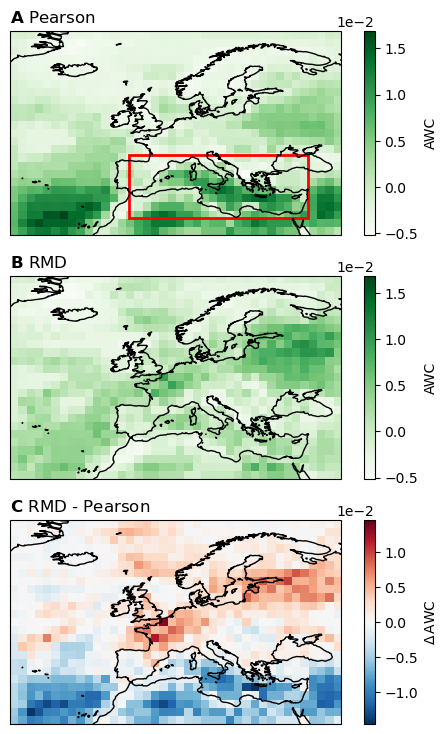

In [50]:
import matplotlib.patches as patches

PV, PC, PB, RV, RC, RB = np.load("../output/metrics/awc.npz").values()
plot_metric(PC, RC, "AWC")

# [15:23,13:36]
ax = plt.gcf().get_axes()[0]
ax.add_patch(patches.Rectangle(xy=[-6, 30], width=42, height=15,
                                facecolor='none', edgecolor='red', lw=2,
                                transform=ccrs.PlateCarree()))

plt.savefig("../plots/awc.pdf", bbox_inches="tight")

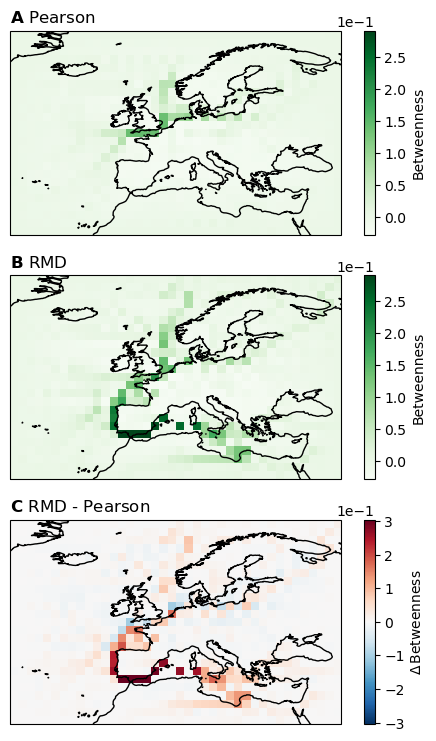

In [28]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/betweenness.npz").values()
plot_metric(PC, RC, "Betweenness")
plt.savefig("../plots/betweenness.pdf", bbox_inches="tight")

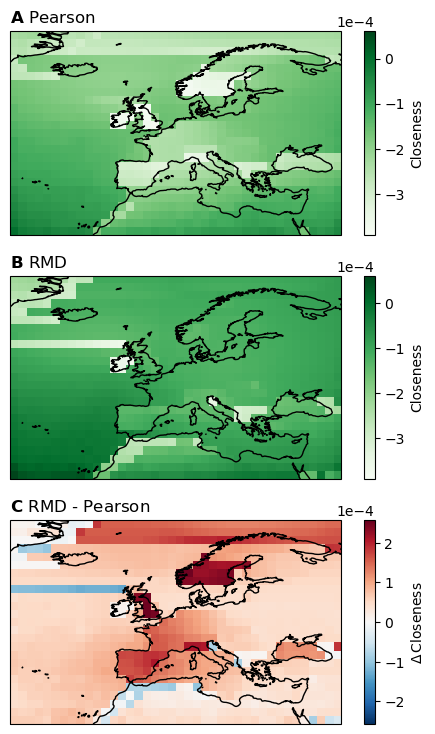

In [29]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/closeness.npz").values()
plot_metric(PC, RC, "Closeness")
plt.savefig("../plots/closeness.pdf", bbox_inches="tight")

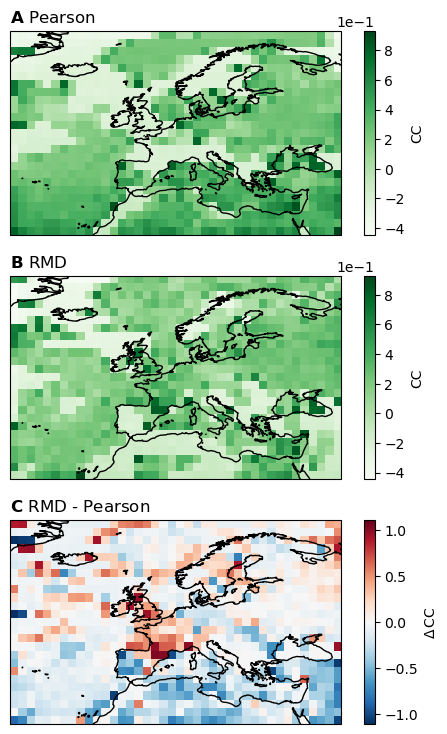

In [30]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/clustering_coefficient.npz").values()
plot_metric(PC, RC, "CC")
plt.savefig("../plots/clustering_coefficient.pdf", bbox_inches="tight")

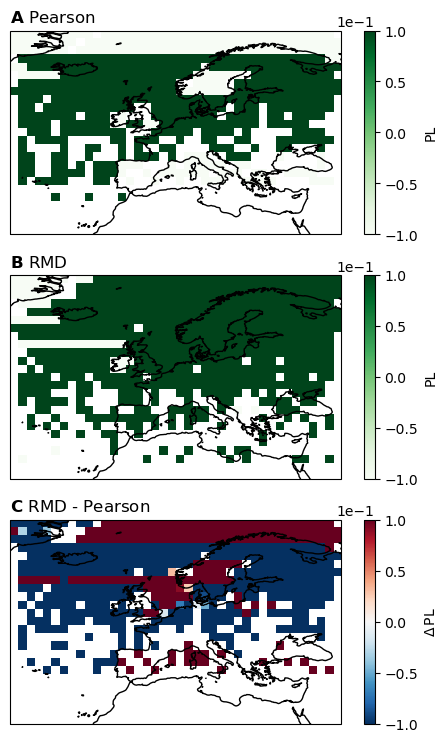

In [32]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/average_path_length.npz").values()
plot_metric(PC, RC, "PL")
plt.savefig("../plots/average_path_length.pdf", bbox_inches="tight")